In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sys, os, re
from pandas.tseries.offsets import DateOffset
from obspy.signal.filter import lowpass

In [2]:
fnst='ModelFit/trim.slst'
modelcase=["soil_temp","soil_temp_lake"] #,"snow","soil_snow","temp_snow","soil_temp_snow"]

BGU

-0.2467077374347269 -0.2467077374347269
-0.07355651731135579 -0.07355651731135579
-0.8179438147162252 -0.8179438147162252
   Fitting_results stnm         A         B         C     tshift      blin  \
0  Fitting_results  BGU -0.151315 -0.000027  0.242823  89.997887  0.000056   

       logf  nsteps  nwlker  
0 -2.112412   12000      32  
90 <class 'str'>
<DateOffset: days=90>
BRPU

-0.1100833244061898 -0.1100833244061898
-0.20958187135750966 -0.20958187135750966
-0.06906828445516008 -0.06906828445516008
   Fitting_results  stnm         A        B         C     tshift      blin  \
1  Fitting_results  BRPU -0.116452 -0.09752  0.004031  89.980622  0.000072   

       logf  nsteps  nwlker  
1 -1.642216   12000      32  
90 <class 'str'>
<DateOffset: days=90>
BSUT

-0.14321594806675486 -0.14321594806675486
-0.2778605859503561 -0.2778605859503561
-0.40493074177165866 -0.40493074177165866
   Fitting_results  stnm         A         B         C     tshift  blin  \
2  Fitting_results  BSUT  

/tmp/ipykernel_898455/2559534347.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, axs = plt.subplots(6, figsize=(8,10))


RDMU

-0.09357389638109029 -0.09357389638109029
0.23424765656133018 0.23424765656133018
-0.5664092328631836 -0.5664092328631836
    Fitting_results  stnm         A         B         C     tshift  blin  \
21  Fitting_results  RDMU -0.042614 -0.000108  0.136912  60.708864   0.0   

        logf  nsteps  nwlker  
21 -1.800371   12000      32  
61 <class 'str'>
<DateOffset: days=61>
SPU

-0.3875588021379223 -0.3875588021379223
0.22749777476991112 0.22749777476991112
-0.400408213105867 -0.400408213105867
    Fitting_results stnm         A         B         C     tshift      blin  \
22  Fitting_results  SPU -0.093374 -0.000029  0.201244  65.600014  0.000038   

        logf  nsteps  nwlker  
22 -1.694912   12000      32  
66 <class 'str'>
<DateOffset: days=66>
SRU

-0.36182835871103514 -0.36182835871103514
0.38103110113250227 0.38103110113250227
-0.32971012259316484 -0.32971012259316484
    Fitting_results stnm         A         B         C     tshift      blin  \
23  Fitting_results  SRU -0

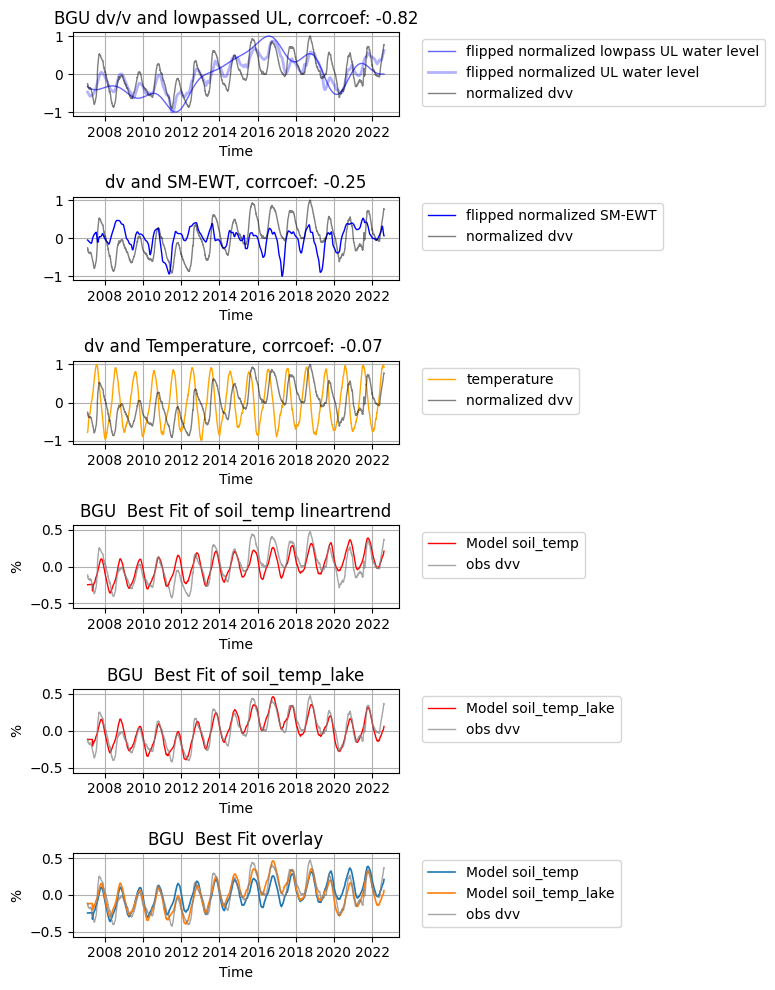

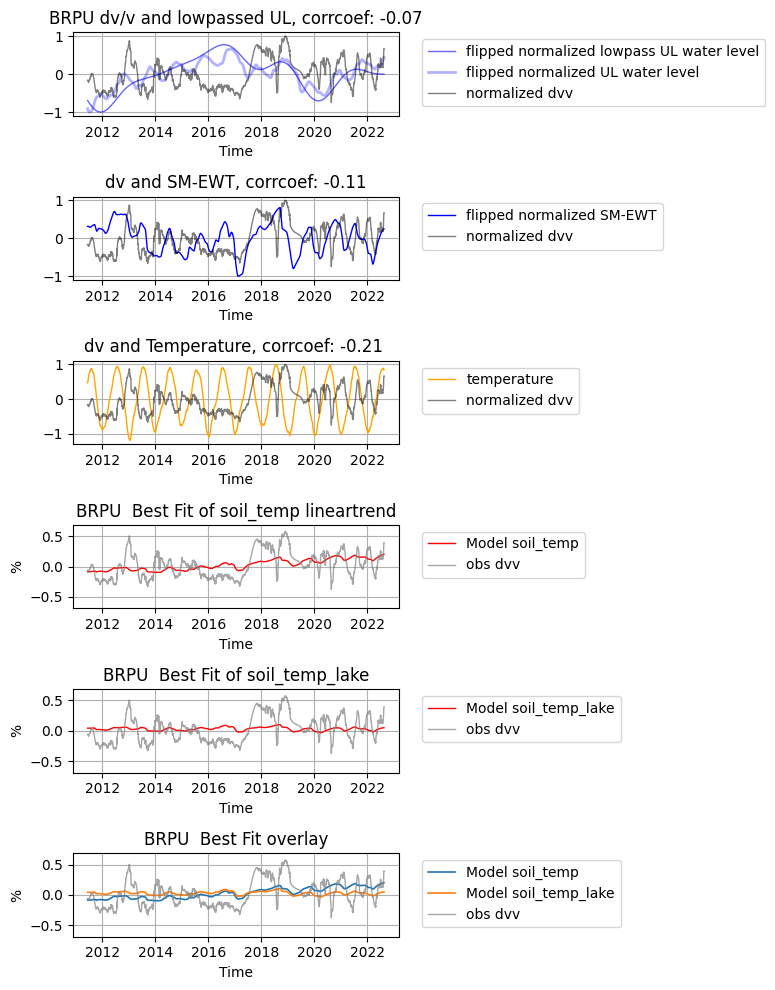

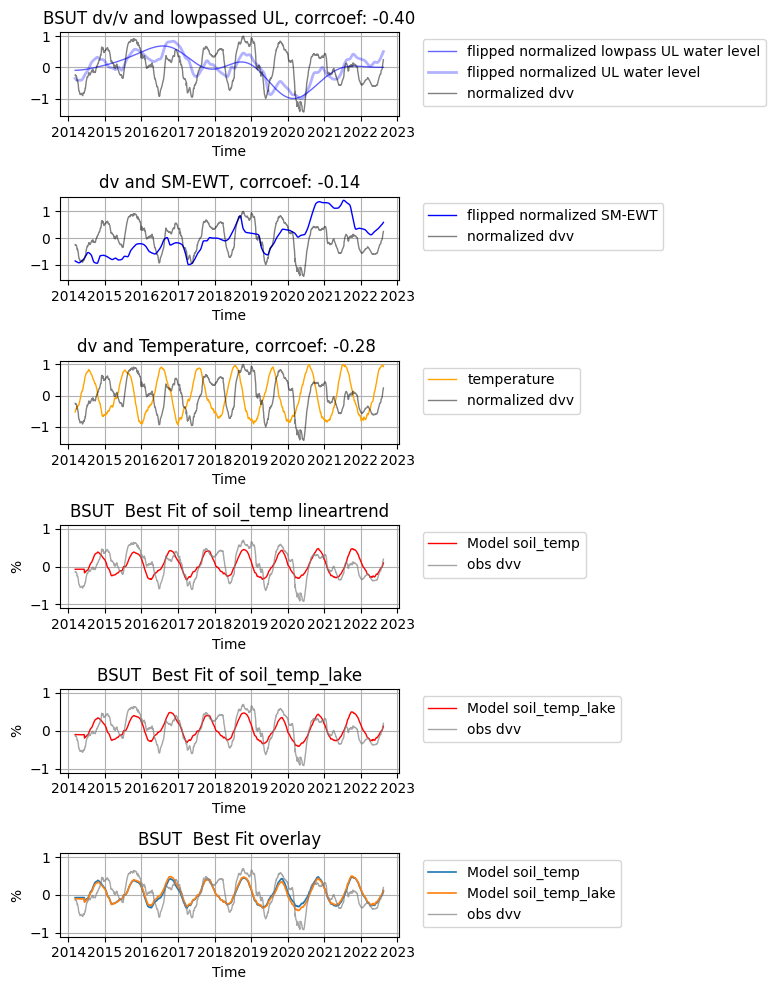

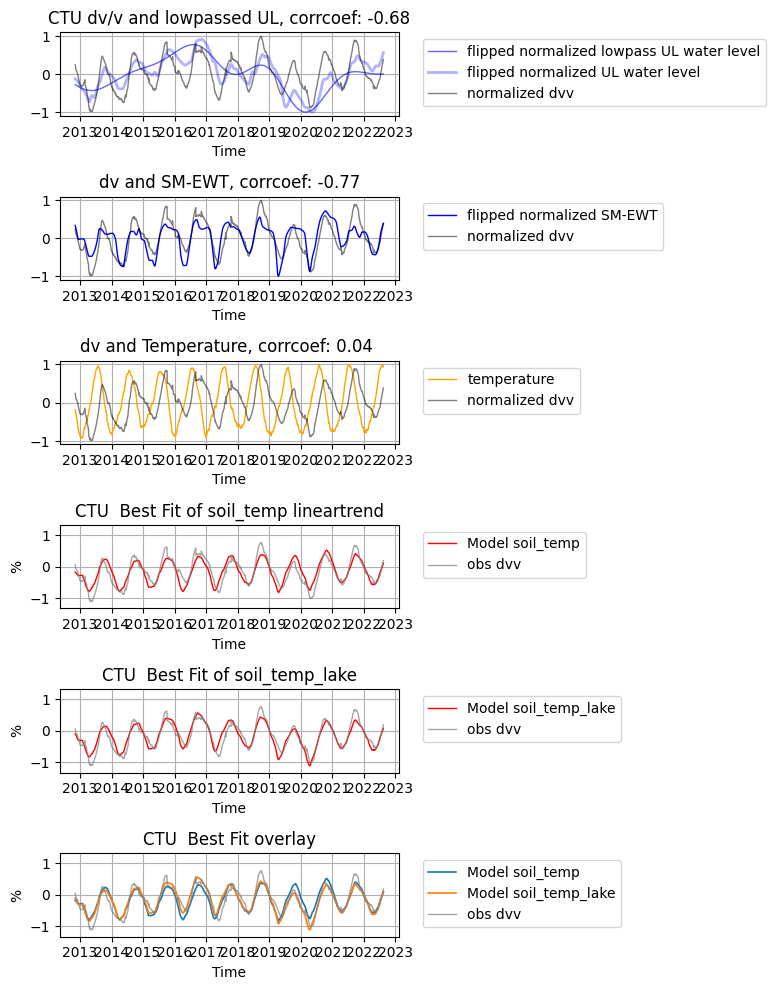

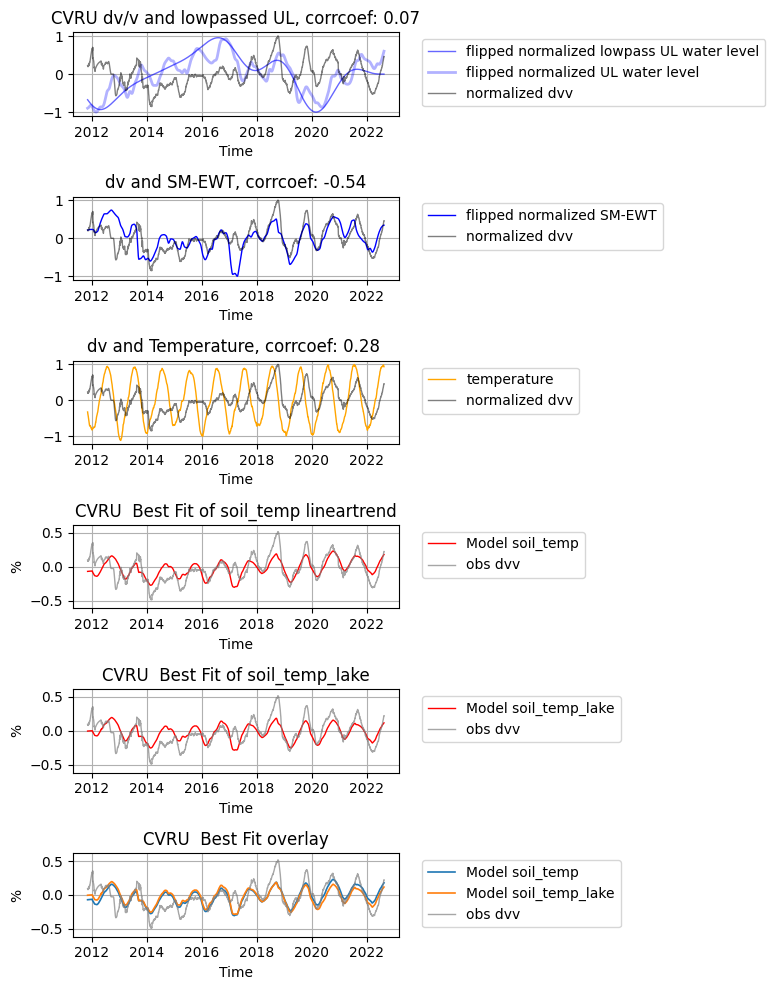

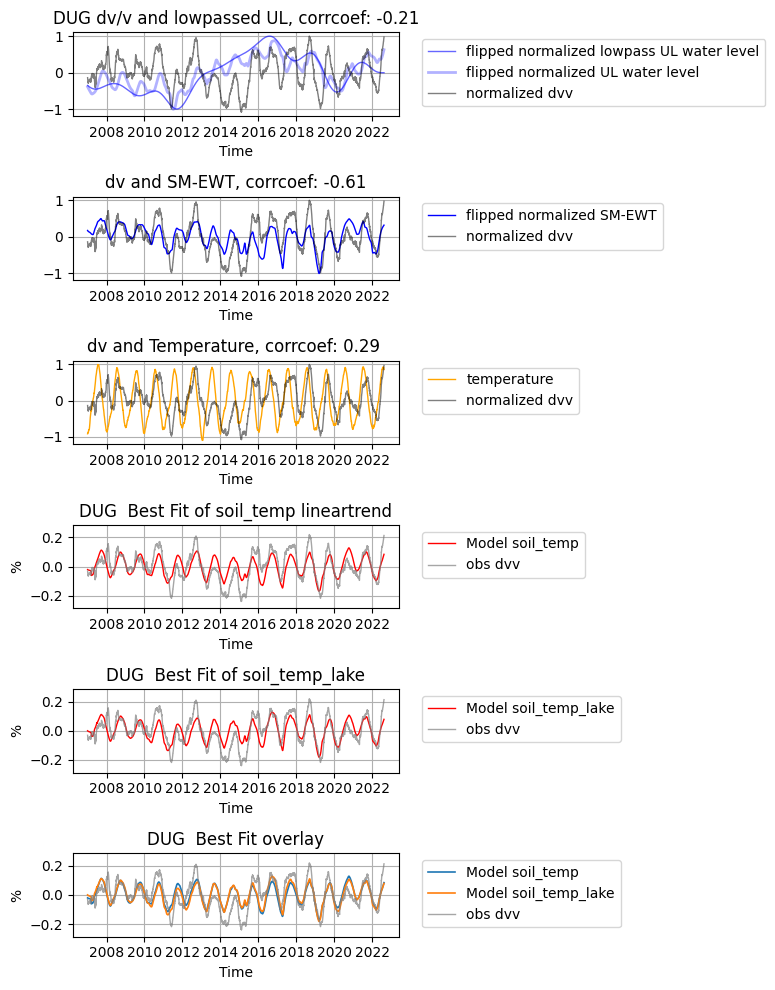

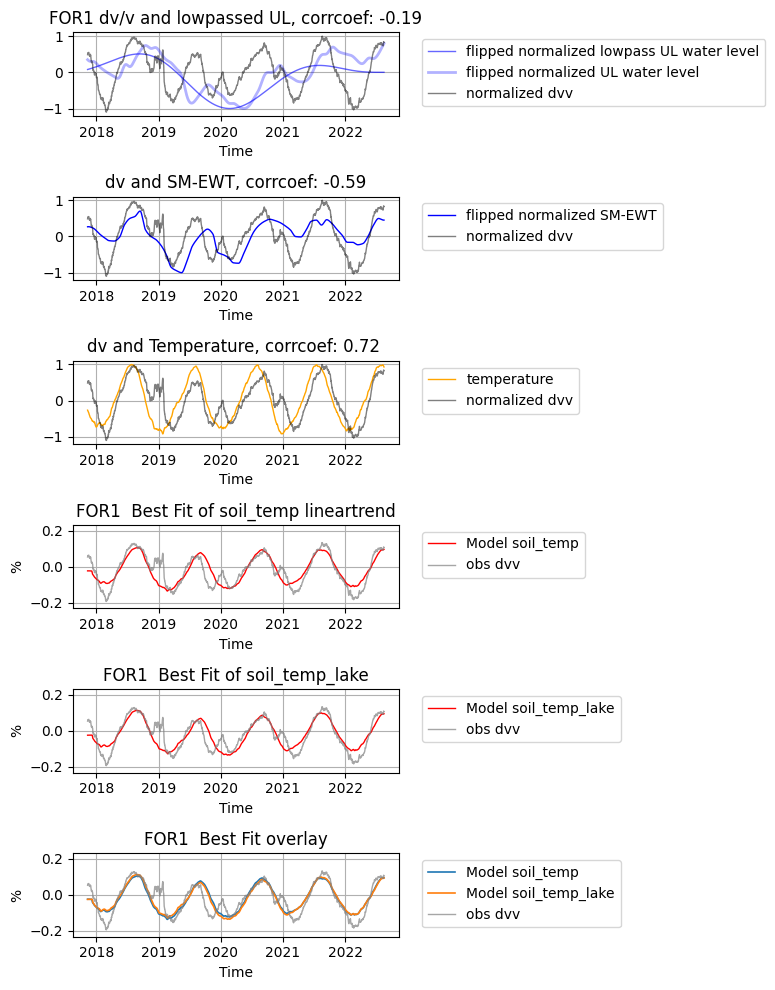

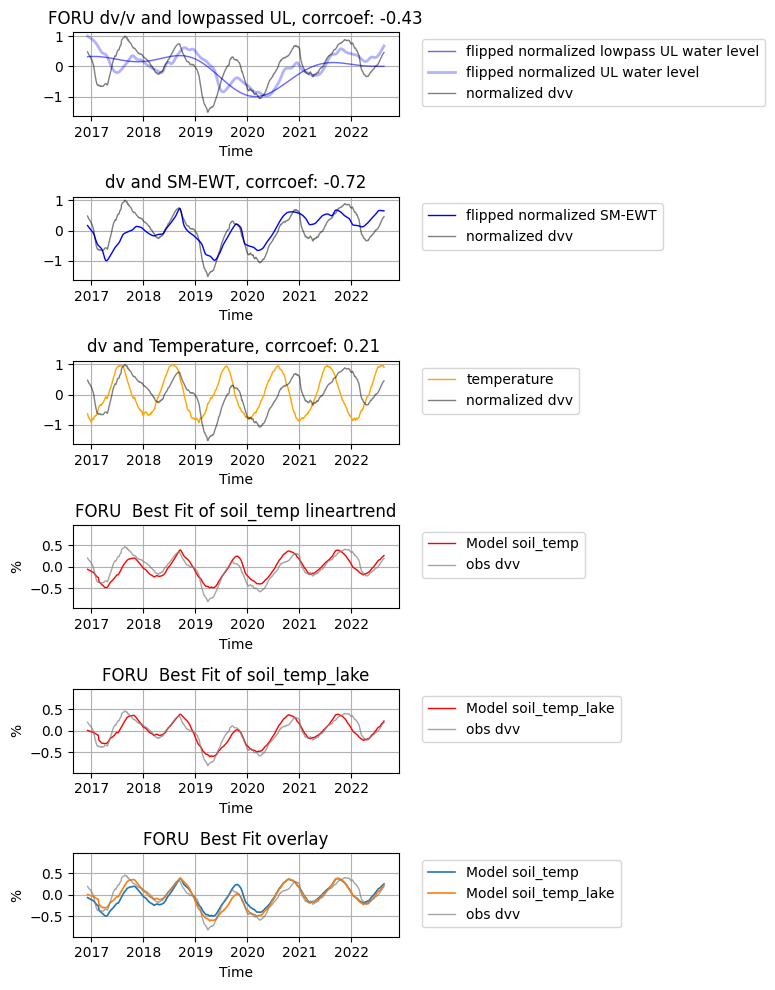

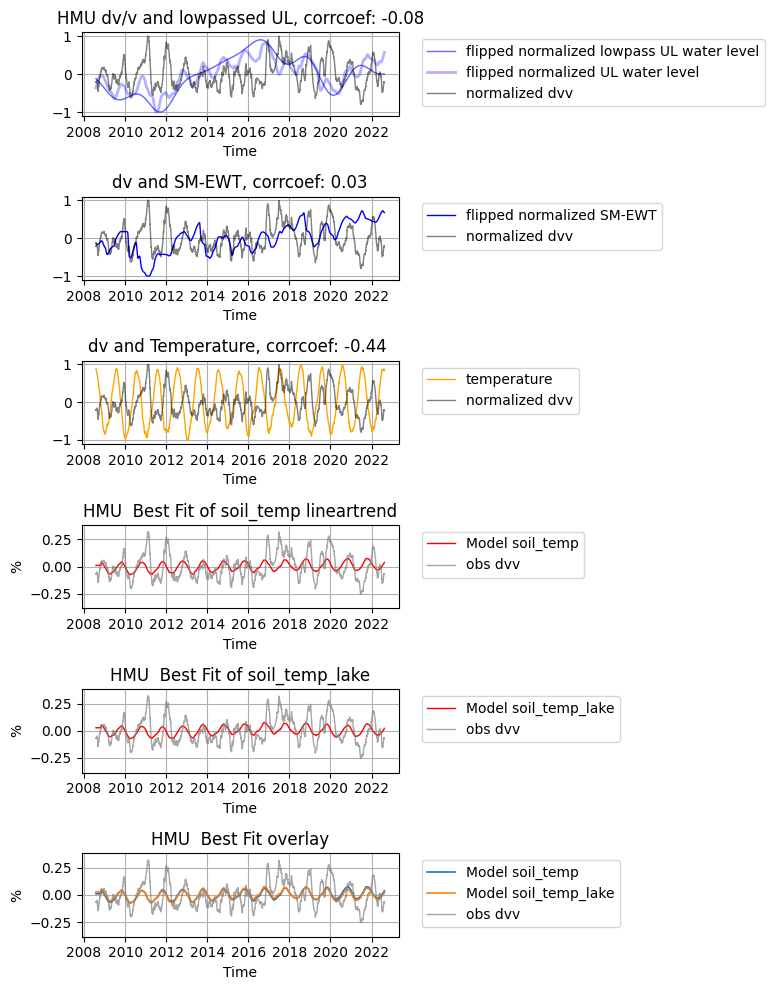

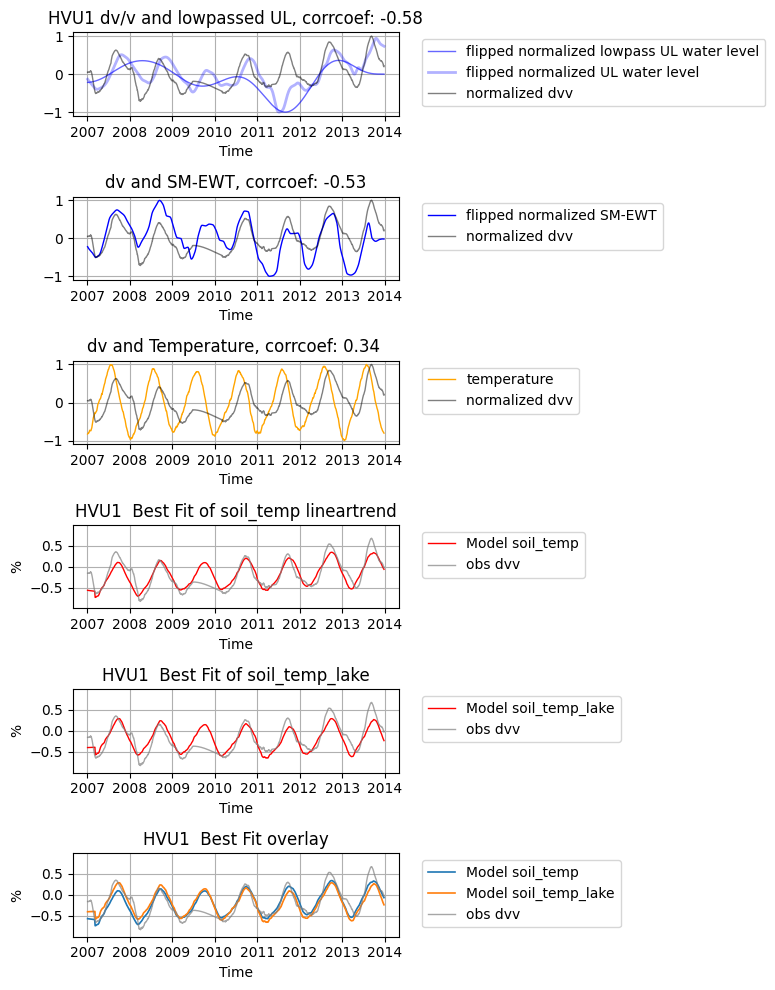

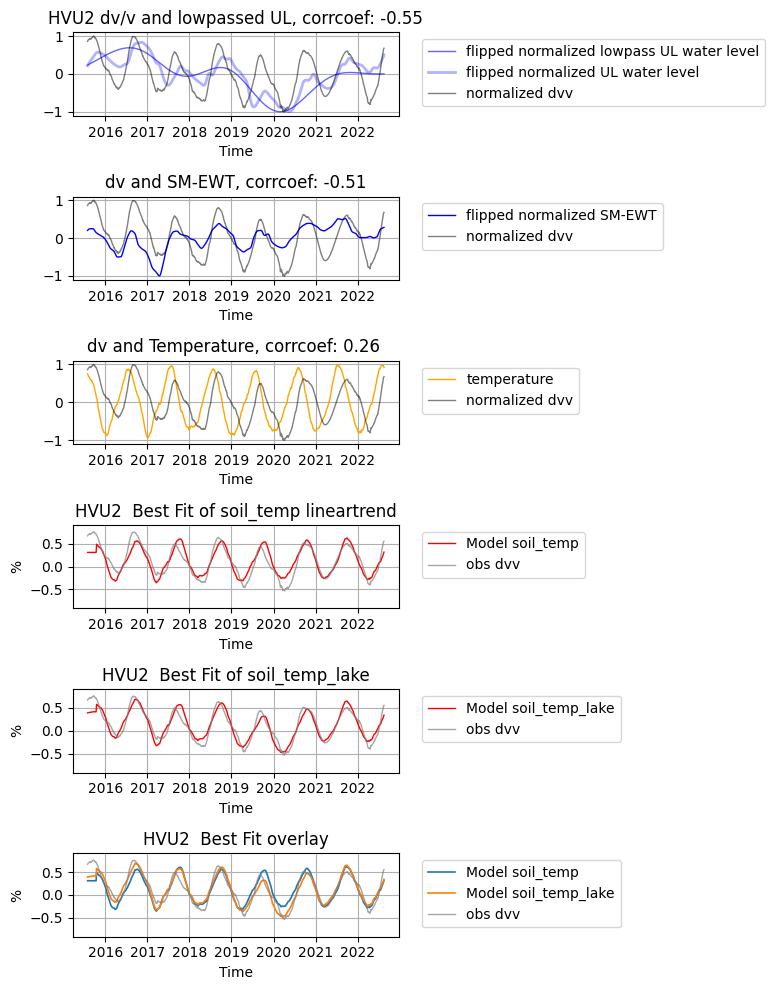

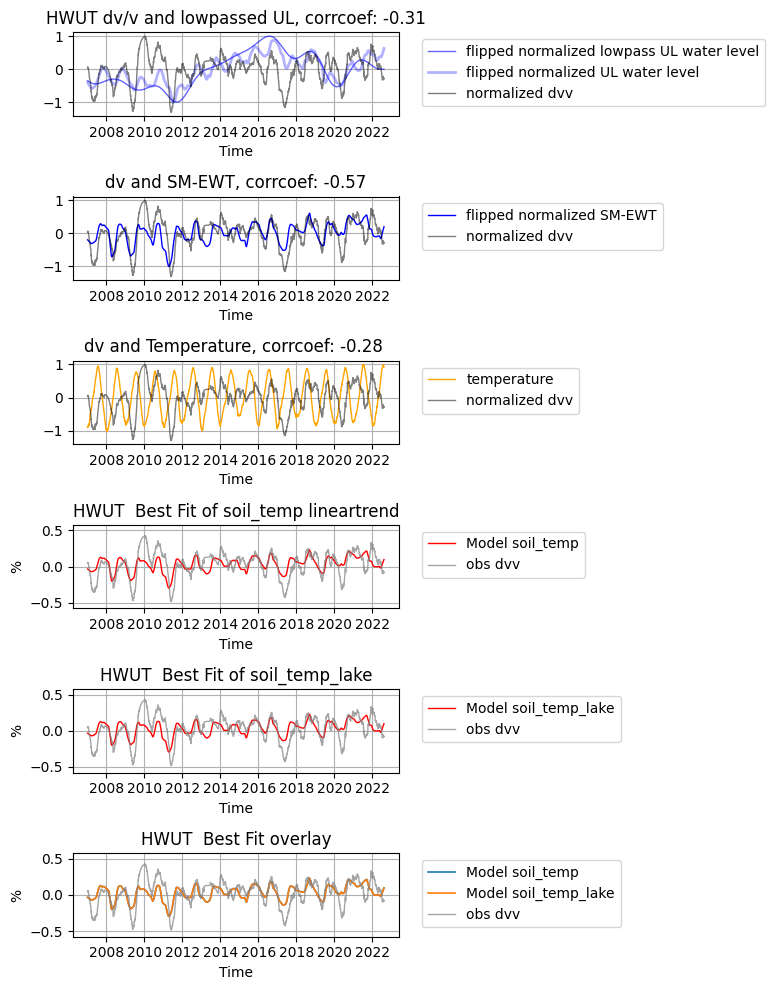

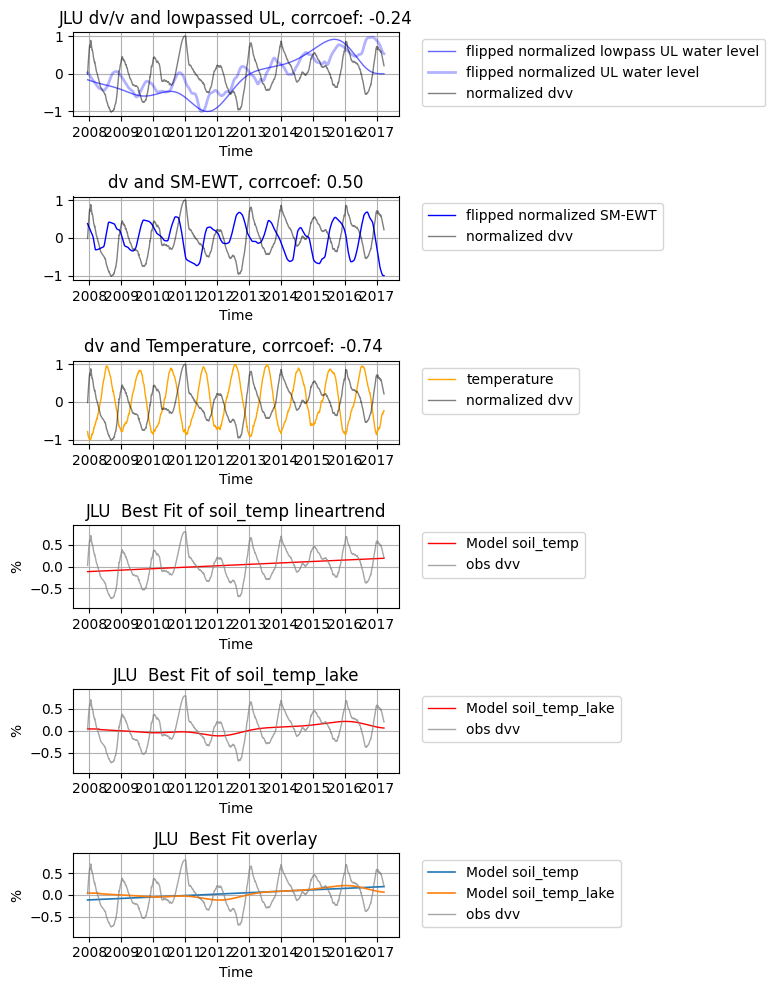

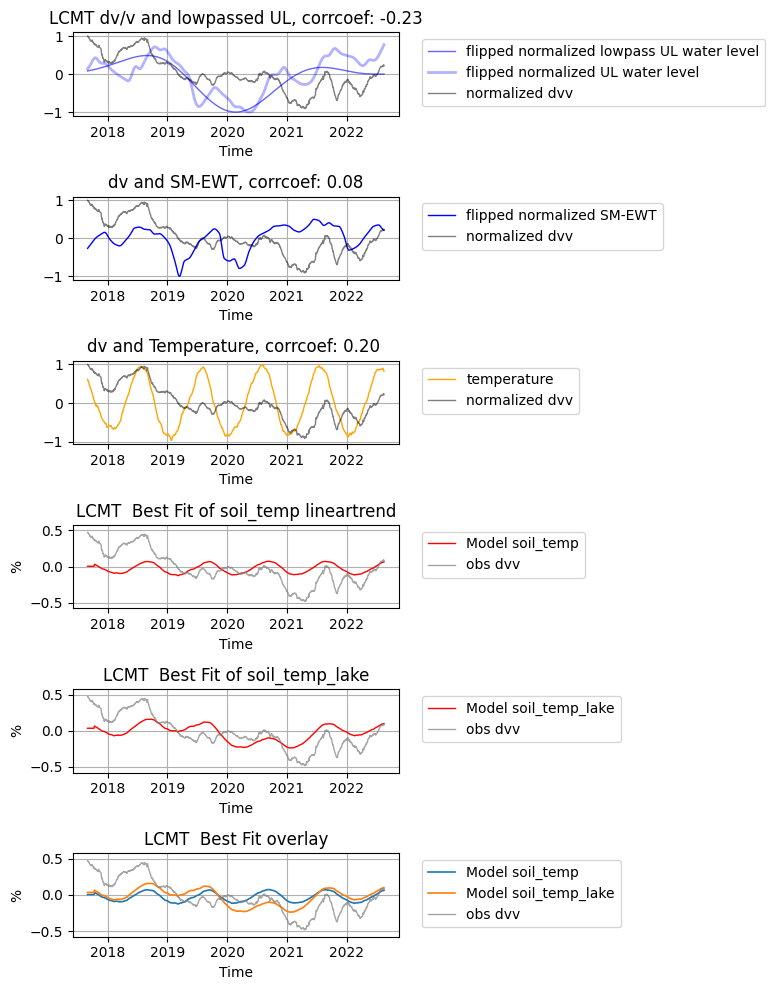

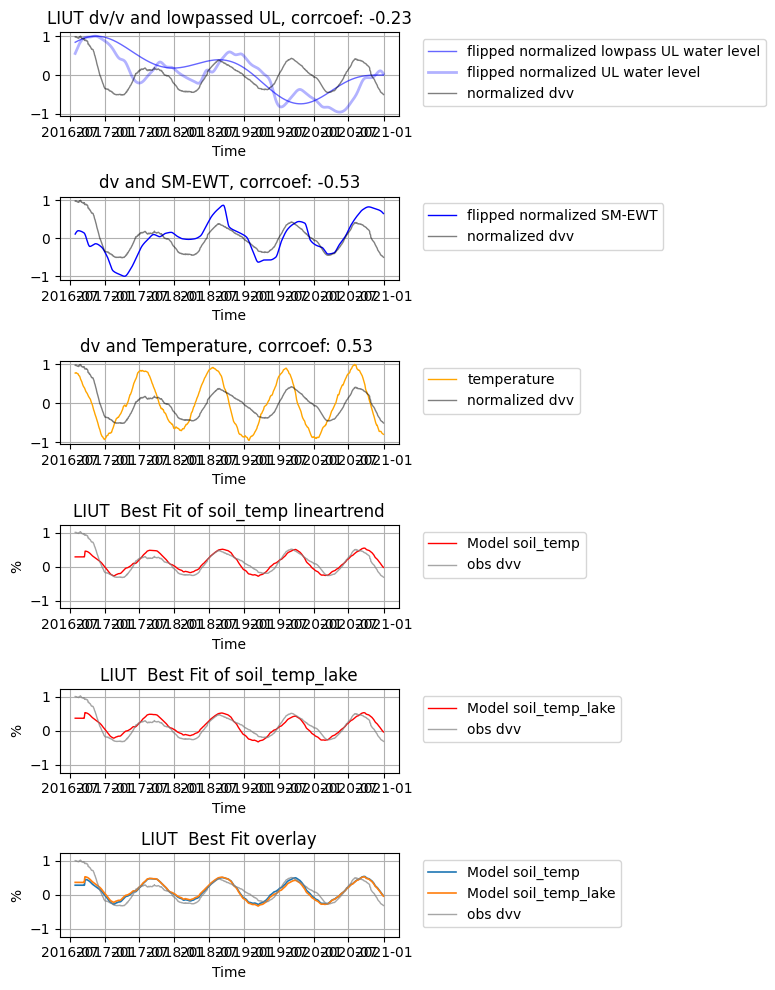

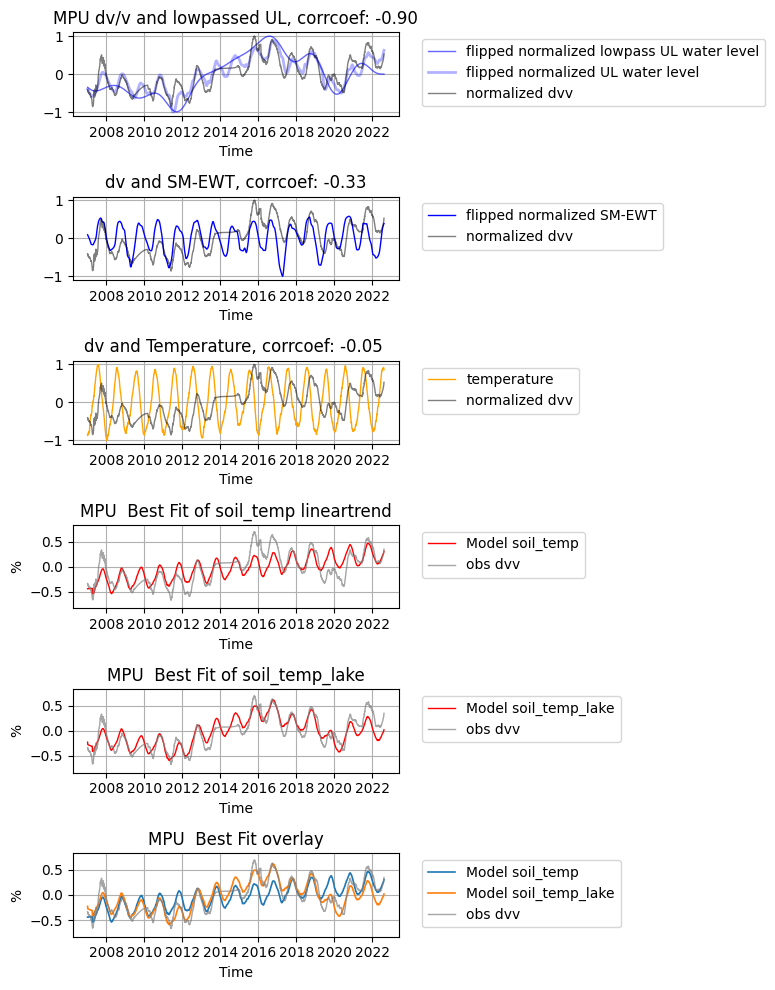

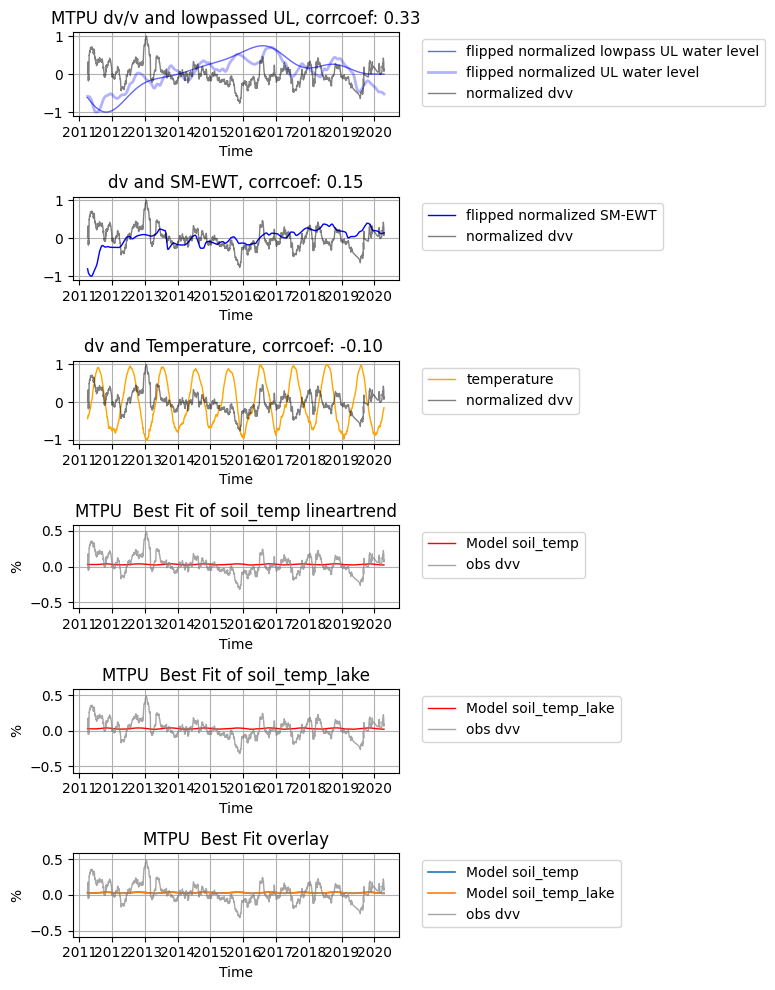

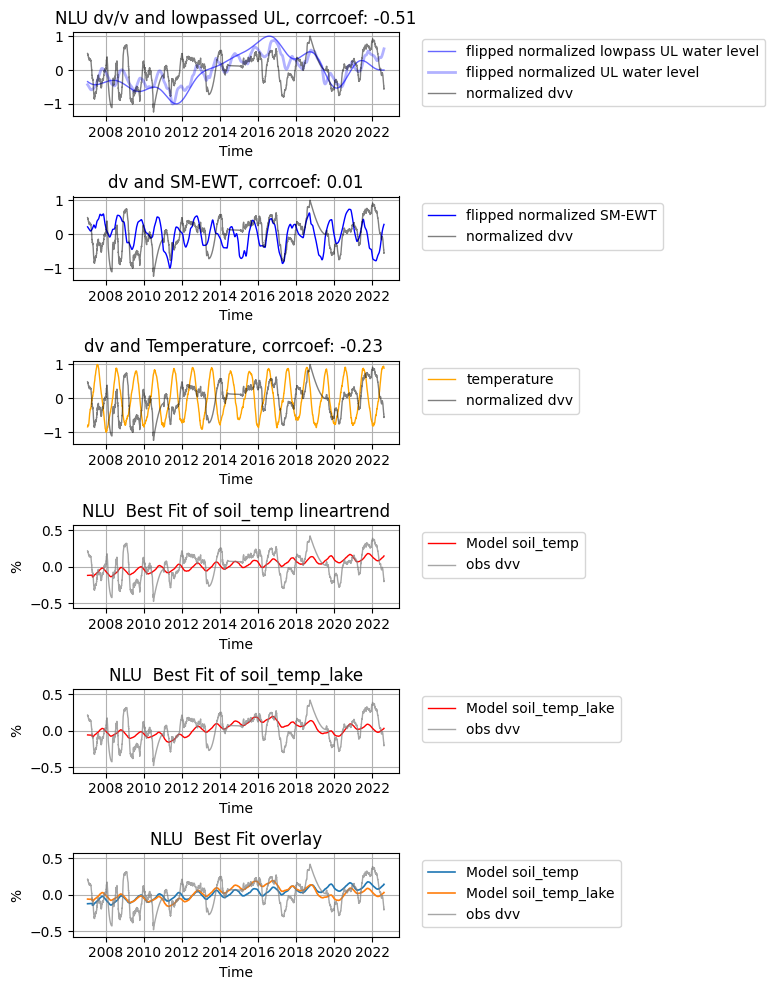

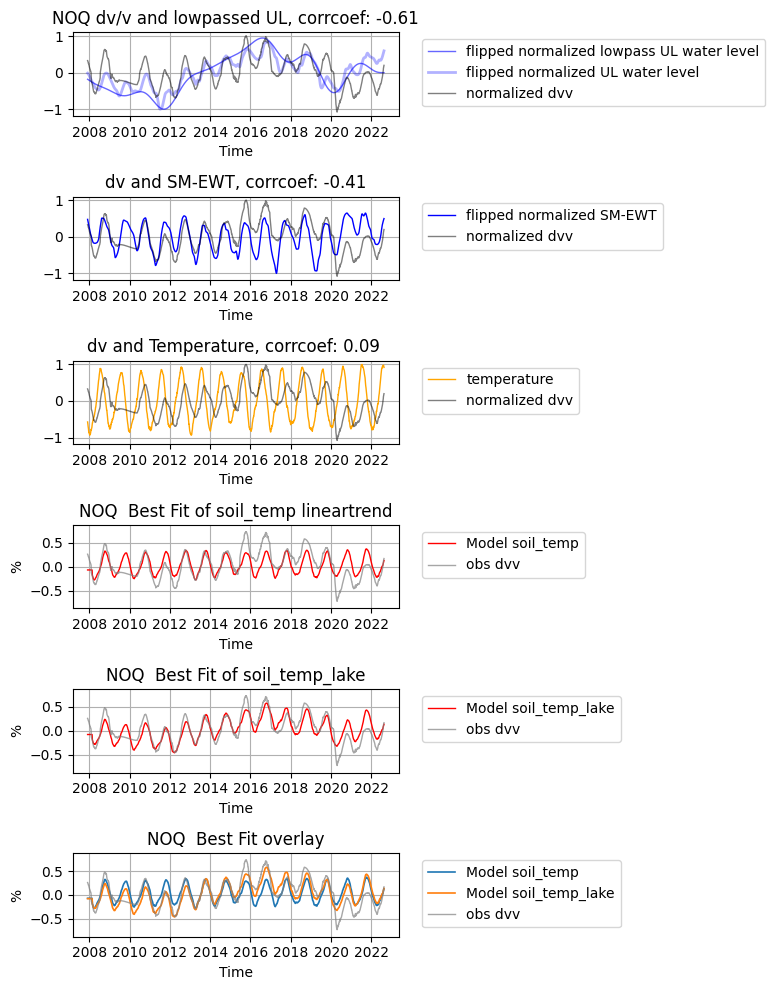

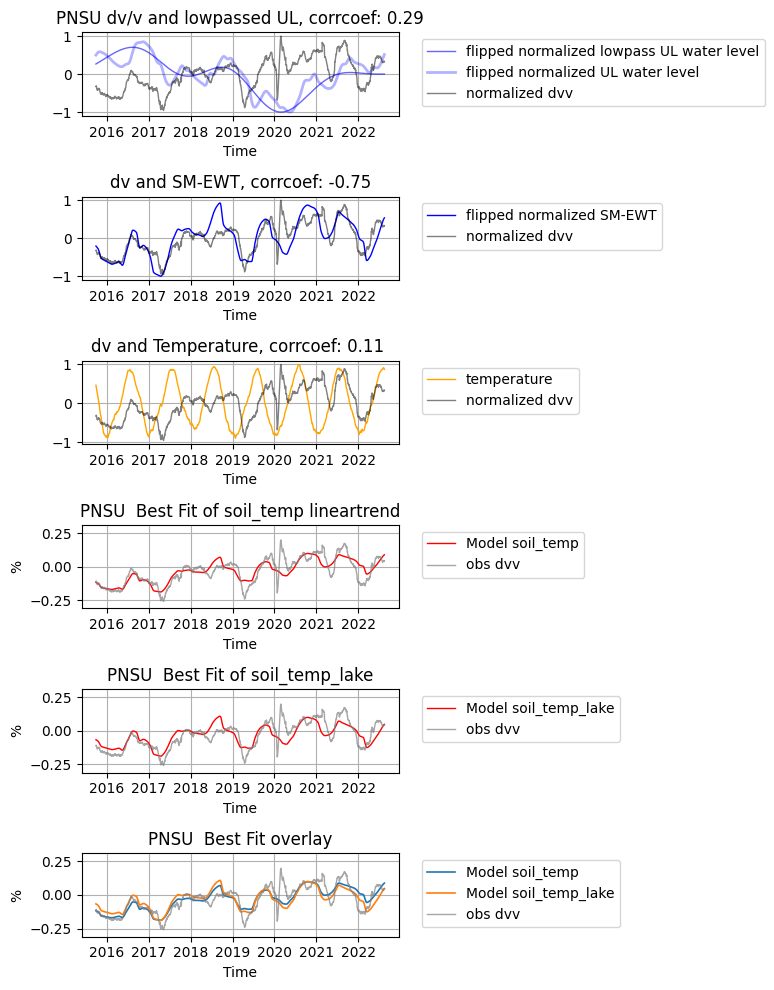

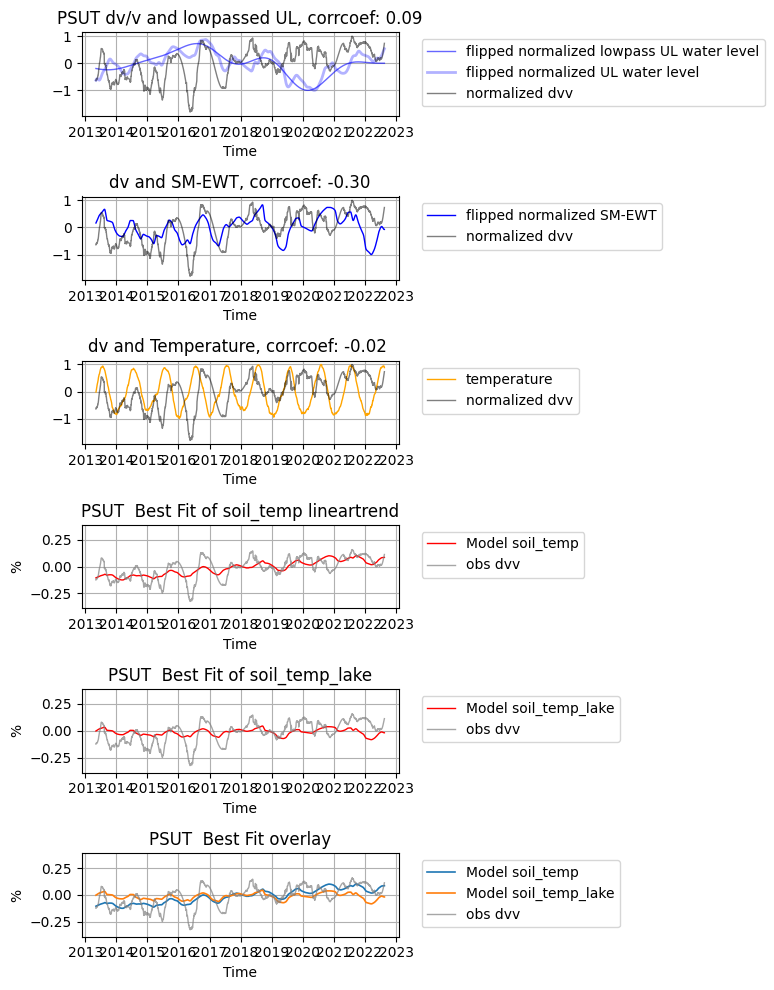

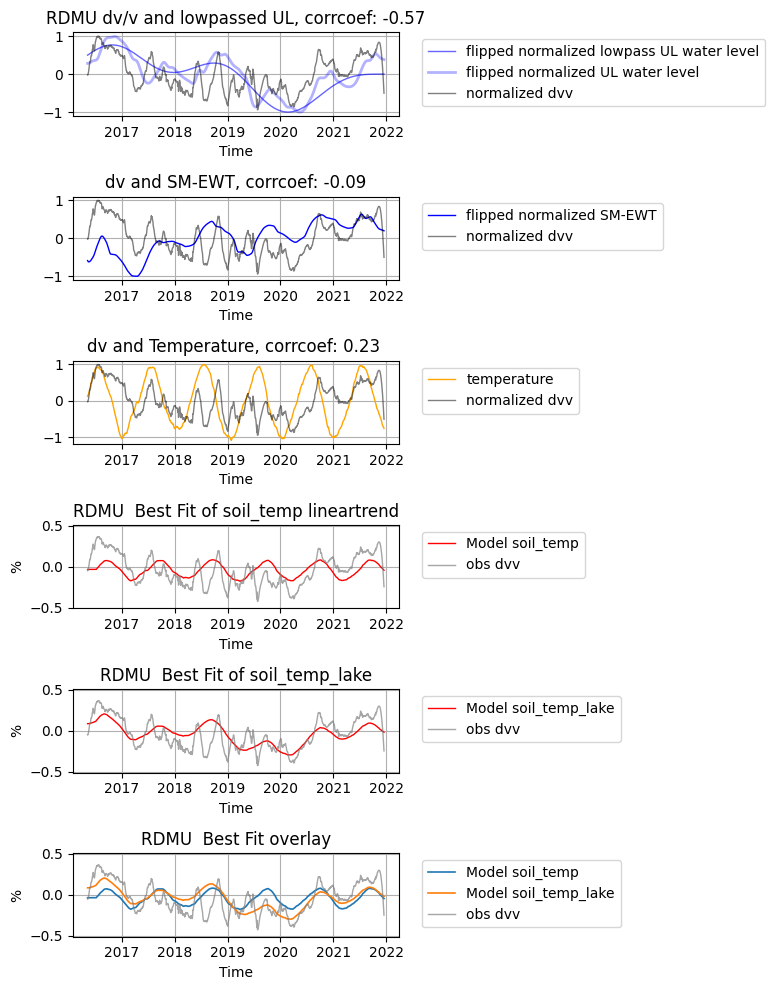

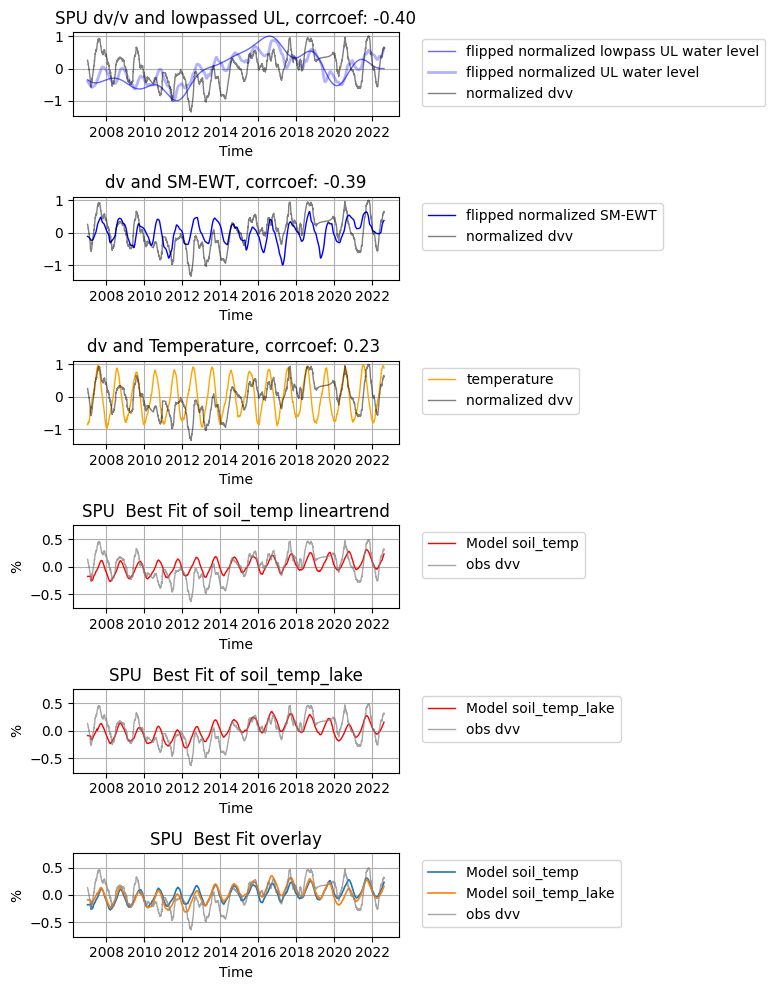

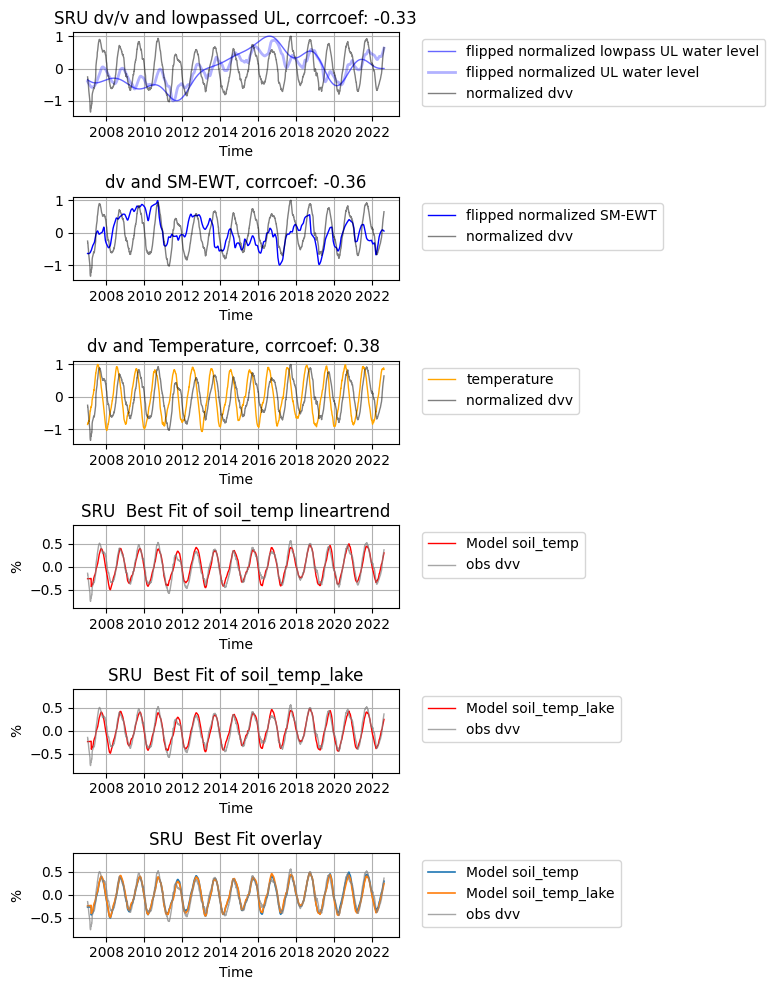

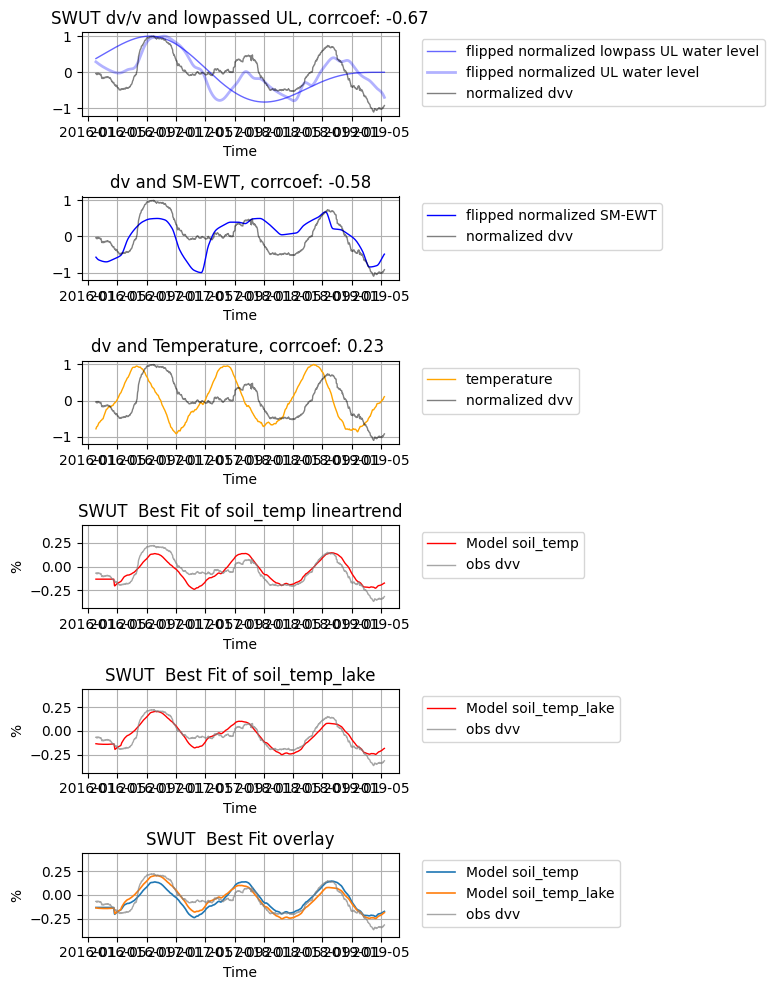

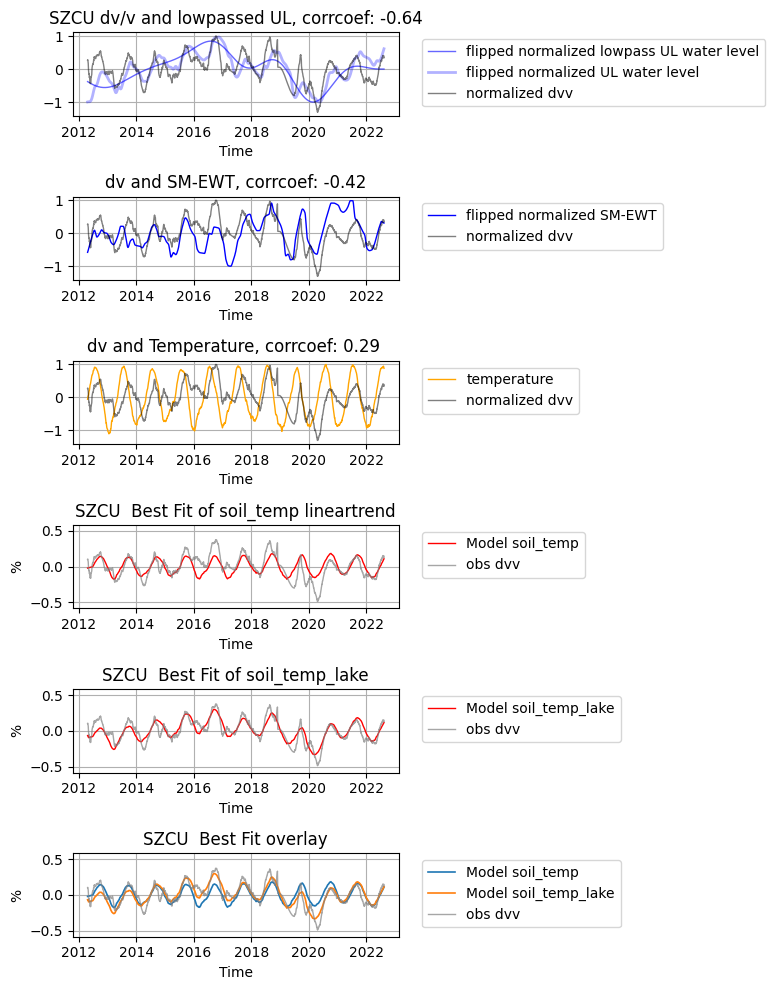

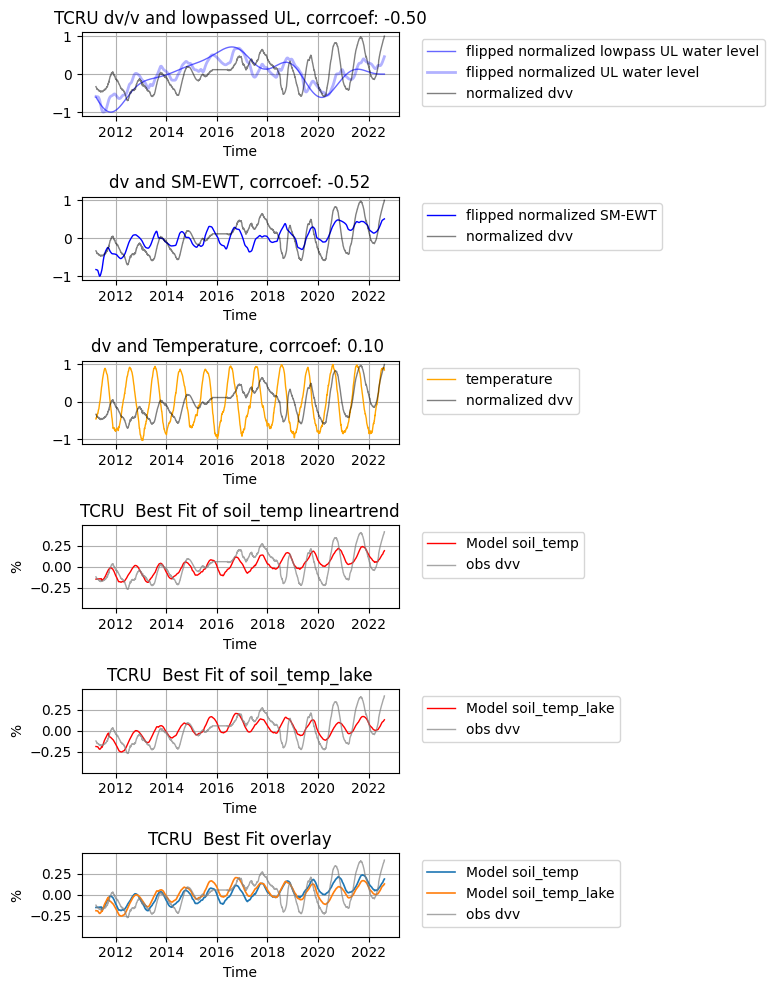

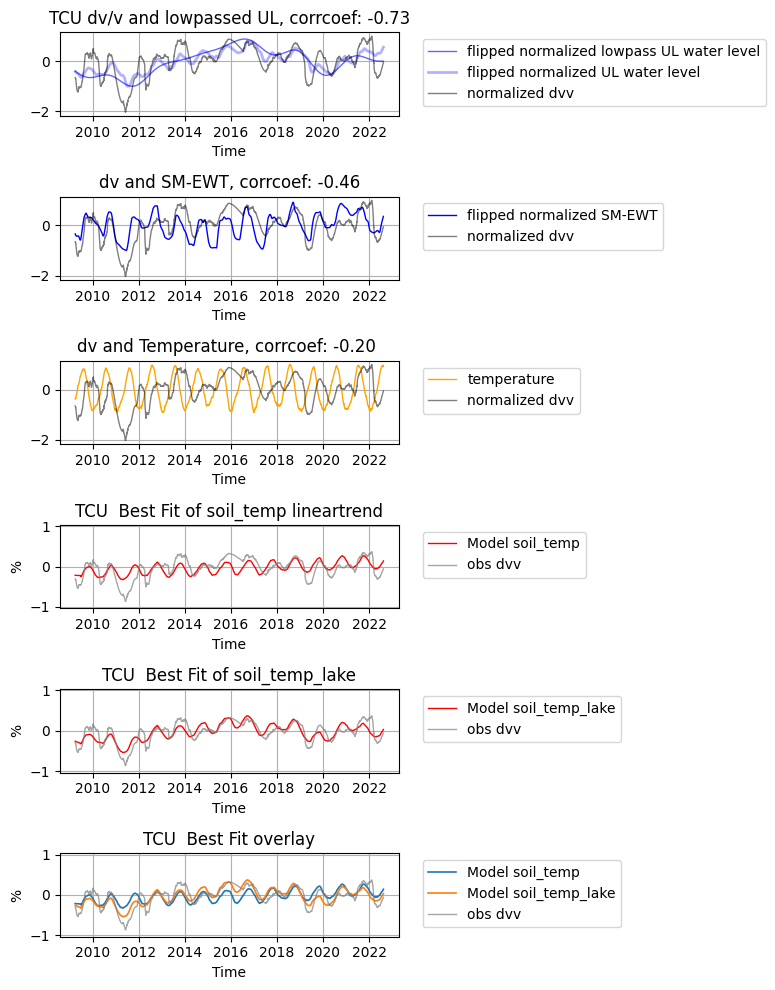

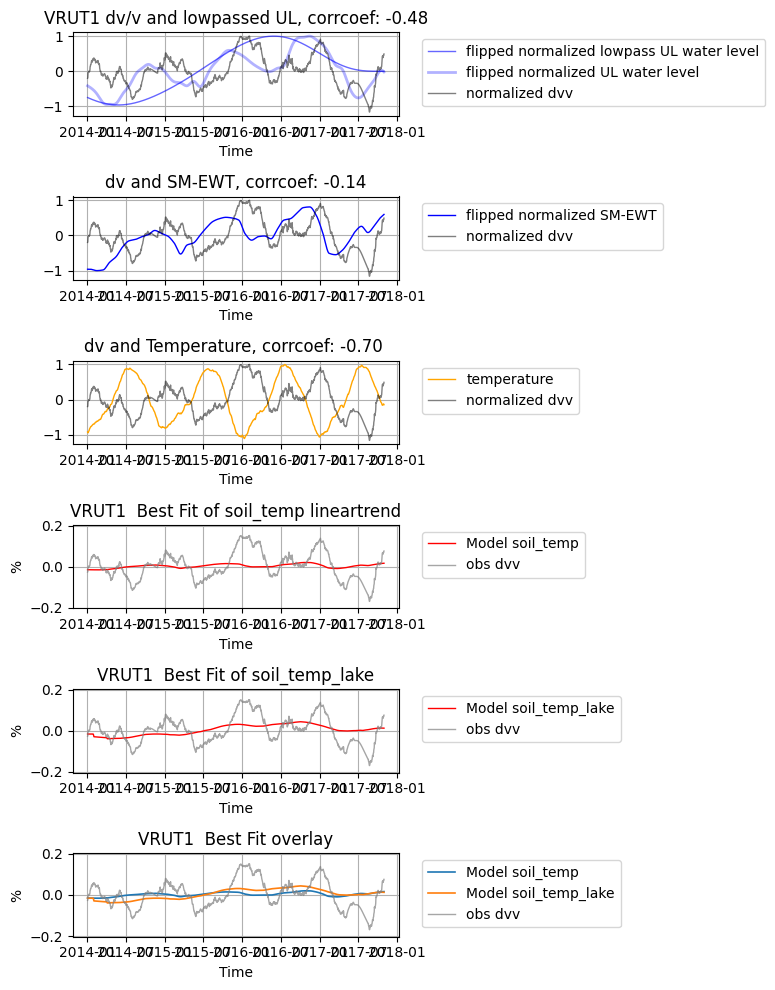

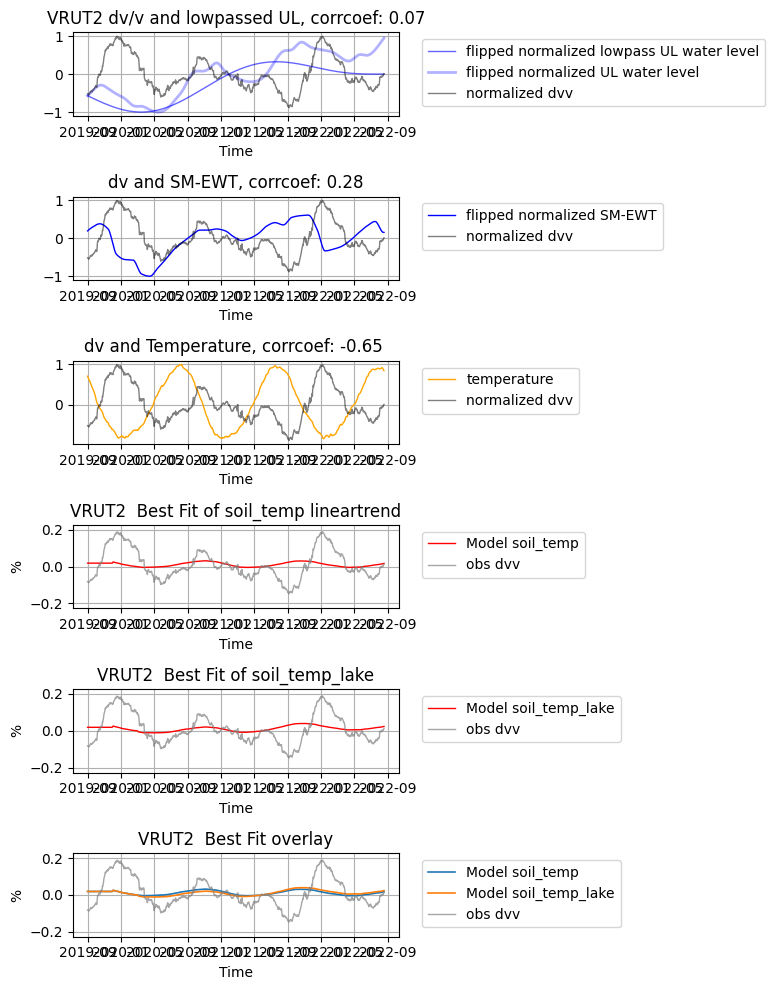

In [3]:
with open(fnst, 'r') as f:
    for stnm in f:
        print(stnm)
        fig, axs = plt.subplots(6, figsize=(8,10))
        figname='Best_'+stnm.strip()+'_fitdv.png'
        
        fn=f'./PREP_data_demean/INTERP_{stnm.strip()}.csv'
        if (stnm.strip() == 'HVU1') or (stnm.strip() == 'HVU2') or (stnm.strip() == 'VRUT1') or (stnm.strip() == 'VRUT2'):
            dfdata=pd.read_csv(fn,usecols=['utvec','dv','err','temp_degC','SM_EWT_meter','snow_EWT_meter','GSL_meter','UL_meter','date'],sep=',')
            soil=(dfdata.SM_EWT_meter-dfdata.SM_EWT_meter.mean())
            soil=soil/np.max(soil)
            temp=(dfdata.temp_degC-dfdata.temp_degC.mean())
            temp=temp/np.max(temp)
            
            sampling_interval = 1.0/365  # 1 day
            sampling_rate = 1.0 / sampling_interval  # samples per day
            corner_frequency = 1.0/2  # cutoff frequency (1 cycle per n years)
            order = 4  # order of the filter
            gwtemp=(np.array(dfdata['UL_meter'])-np.mean(np.array(dfdata['UL_meter'])))
            gwtemp=lowpass(gwtemp, freq=corner_frequency, df=sampling_rate, corners=order, zerophase=True)
            gwtemp=gwtemp/np.max(np.abs(gwtemp))
            UL=np.array(dfdata['UL_meter'])-np.array(dfdata['UL_meter']).mean()
            UL=UL/np.max(np.abs(UL)) 
            
        else:
            dfdata=pd.read_csv(fn,usecols=['utvec','dv','err','temp','SM_EWT','snow_EWT','GSL','UL','date'],sep=',')
            soil=(dfdata.SM_EWT-dfdata.SM_EWT.mean())
            soil=soil/np.max(soil)
            temp=(dfdata.temp-dfdata.temp.mean())
            temp=temp/np.max(temp)
            
            sampling_interval = 1.0/365  # 1 day
            sampling_rate = 1.0 / sampling_interval  # samples per day
            corner_frequency = 1.0/2  # cutoff frequency (1 cycle per n years)
            order = 4  # order of the filter
            gwtemp=(np.array(dfdata['UL'])-np.mean(np.array(dfdata['UL'])))
            gwtemp=lowpass(gwtemp, freq=corner_frequency, df=sampling_rate, corners=order, zerophase=True)
            gwtemp=gwtemp/np.max(np.abs(gwtemp))
            UL=np.array(dfdata['UL'])-np.array(dfdata['UL']).mean()
            UL=UL/np.max(np.abs(UL)) 


        R2soil=np.corrcoef(dfdata.dv,soil)[0,1]
        R2temp=np.corrcoef(dfdata.dv,temp)[0,1]
        print(R2soil, pd.Series(dfdata.dv).corr(pd.Series(soil))) 
        print(R2temp, pd.Series(dfdata.dv).corr(pd.Series(temp)))
        
 
        R2UL=np.corrcoef(dfdata.dv,UL)[0,1]
        print(R2UL, pd.Series(dfdata.dv).corr(pd.Series(UL)))

        for m, model in enumerate(modelcase):
            cols = ['utvec', 'dv','bestfit','Resi','sdv']
            fcsv="BestFit_csv_byfitdv/Fit_"+stnm.strip()+"_"+model+".csv"
            #print(fcsv)
            fi=pd.read_csv(fcsv,usecols=cols,sep=',')
            
            axs[m+3].plot( pd.to_datetime(fi.utvec),fi.bestfit, '-', color='red', linewidth=1 ,label='Model '+model,)
            axs[5].plot( pd.to_datetime(fi.utvec),fi.bestfit ,'-' , linewidth=1.2, label='Model '+model)
            if (model == 'temp') :
                fn2=f'BestFit_csv_byfitdv/ModelCase_{model}_scalar_coef.txt'
                coef=pd.read_csv(fn2,sep=',')
                coef_line = coef[coef['stnm'].str.contains(stnm.strip())]
                print(coef_line)
                tshift='%d'%round(coef_line['tshift'].values[0])
                print(tshift, type(tshift))
                print(pd.DateOffset(days=int(tshift)))
                
                axs[m+3].plot( pd.to_datetime(fi.utvec)+ pd.DateOffset(days=int(tshift)) ,temp ,'-', color='orange' , alpha=0.2, linewidth=2, label=f'shift temp ({tshift} days) on '+model)
                axs[m+3].plot( pd.to_datetime(fi.utvec) ,soil*-1 ,'-', color='blue' , alpha=0.1, linewidth=2, label=f'flipped SM-EWT on '+model)
            elif (model == 'soil_temp'):
                fn2=f'BestFit_csv_byfitdv/ModelCase_{model}_scalar_coef.txt'
                coef=pd.read_csv(fn2,sep=',')
                coef_line = coef[coef['stnm'].str.contains(stnm.strip())]
                print(coef_line)
                tshift='%d'%round(coef_line['tshift'].values[0])
                print(tshift, type(tshift))
                print(pd.DateOffset(days=int(tshift)))
                
                #axs[m+3].plot( pd.to_datetime(fi.utvec)+ pd.DateOffset(days=int(tshift)) ,temp ,'-', color='orange' , alpha=0.2, linewidth=2, label=f'shift temp ({tshift} days) on '+model)
                #axs[m+3].plot( pd.to_datetime(fi.utvec) ,soil*-1 ,'-', color='blue' , alpha=0.1, linewidth=2, label=f'flipped SM-EWT on '+model)
            
            else:
                axs[2].plot( pd.to_datetime(fi.utvec),temp ,'-', color='orange' , linewidth=1, label='temperature')
                #axs[m+3].plot( pd.to_datetime(fi.utvec)+ pd.DateOffset(days=int(tshift)) ,temp ,'-', color='pink' , linewidth=1, label=f'shift temp ({tshift} days) on '+model)
        
        dvv=(fi.dv-fi.dv.mean())
        normaldv=dvv/np.max(dvv)

        axs[0].plot( pd.to_datetime(fi.utvec),gwtemp *-1, '-b' , linewidth=1, alpha=0.6, label='flipped normalized lowpass UL water level')      
        axs[0].plot( pd.to_datetime(fi.utvec),UL *-1 , '-b' , linewidth=2, alpha=0.3, label='flipped normalized UL water level') 
        axs[1].plot( pd.to_datetime(fi.utvec),soil *-1 ,'-' , color='blue', linewidth=1, label='flipped normalized SM-EWT')
        
        axs[0].set_title(f'{stnm.strip()} dv/v and lowpassed UL, corrcoef: {R2UL:.2f}')
        axs[1].set_title(f'dv and SM-EWT, corrcoef: {R2soil:.2f}')   
        axs[2].set_title(f'dv and Temperature, corrcoef: {R2temp:.2f} ')
        axs[3].set_title(stnm.strip()+'  Best Fit of '+modelcase[0]+' lineartrend')
        axs[4].set_title(stnm.strip()+'  Best Fit of '+modelcase[1]) 
        axs[5].set_title(stnm.strip()+'  Best Fit overlay') 
        #axs[0].plot( pd.to_datetime(fi.utvec),fi.dv, '-k' , linewidth=1, alpha=0.5, label='obs dvv')
        for k in range(3,6):
            axs[k].plot( pd.to_datetime(fi.utvec),fi.dv, '-', color='grey' , linewidth=1, alpha=0.7, label='obs dvv')
            axs[k].set_ylim(np.max(np.abs(fi.dv))*-1.2 , np.max(np.abs(fi.dv))*1.2)
            axs[k].set_ylabel("%")
        for k in range(0,3):
            axs[k].plot( pd.to_datetime(fi.utvec),normaldv, '-k' , linewidth=1, alpha=0.5, label='normalized dvv')
        for k in range(0,6):
            axs[k].legend(bbox_to_anchor=(1.05, 1), loc='upper left')
            axs[k].set_xlabel('Time')
            axs[k].grid(True)
                    
        plt.tight_layout()
        #plt.show()

        plt.savefig(figname, dpi=300)


        